# Time Series

## 1. Importing libraries and files

In [51]:
import numpy as np
import pandas as pd

In [52]:

path = './Data_for_Power_BI/weekly_data_for_power_bi.csv'
path_cluster = './df_cluster.csv'
path_events = './Data_for_Power_BI/daily_calendar_with_expanded_events.csv'


In [53]:
#path = '/content/weekly_data_for_power_bi.csv'
#path_cluster = '/content/df_cluster.csv'
#path_events = '/content/daily_calendar_with_expanded_events.csv'

In [54]:
df_weekly = pd.read_csv(path)
df_calendar_original = pd.read_csv(path_events)
df_cluster = pd.read_csv(path_cluster)

In [55]:
df_calendar = df_calendar_original.groupby('yearweek').agg({'date': 'min', 'Weekly_Event' : 'first'}).reset_index()
df_calendar['Year'] = pd.to_datetime(df_calendar['date']).dt.year
df_calendar['Quarter'] = pd.to_datetime(df_calendar['date']).dt.quarter
df_calendar['Month'] = pd.to_datetime(df_calendar['date']).dt.month
df_calendar['Day_month'] = pd.to_datetime(df_calendar['date']).dt.day

In [56]:
df_calendar.head()

,yearweek,date,Weekly_Event,Year,Quarter,Month,Day_month
0,201105.0,2011-01-29,No Event,2011,1,1,29
1,201106.0,2011-02-05,Superbowl,2011,1,2,5
2,201107.0,2011-02-12,Valentine's Day,2011,1,2,12
3,201108.0,2011-02-19,Presidents' Day,2011,1,2,19
4,201109.0,2011-02-26,No Event,2011,1,2,26


In [57]:
df_weekly.head()

,item,store_code,category_x,department,region,store,yearweek,sale,sell_price,daily_revenue,week_number
0,ACCESORIES_1_004,BOS_1,ACCESORIES,ACCESORIES_1,Boston,South_End,201105.0,10,5.77,57.72,1
1,ACCESORIES_1_004,BOS_2,ACCESORIES,ACCESORIES_1,Boston,Roxbury,201105.0,15,5.77,86.58,1
2,ACCESORIES_1_004,NYC_2,ACCESORIES,ACCESORIES_1,New York,Harlem,201105.0,33,5.77,190.48,1
3,ACCESORIES_1_004,NYC_4,ACCESORIES,ACCESORIES_1,New York,Brooklyn,201105.0,8,5.77,46.18,1
4,ACCESORIES_1_004,PHI_1,ACCESORIES,ACCESORIES_1,Philadelphia,Midtown_Village,201105.0,6,5.77,34.63,1


In [58]:
df_weekly.shape

(6721786, 11)

In [59]:
df_cluster.head()

,sales_ratio_mean,sell_price_mean,sales_ratio_relative_std,release_week,Sociability,Regionality,Seasonality,%trend_slope,price_elasticity,cluster,item
0,2.760999,11.043445,0.290107,131,0.0,0.400899,0.150287,0.0,-0.330625,5,ACCESORIES_1_001
1,1.855793,5.275790,0.582964,6,0.0,0.366412,0.127449,0.0,-0.059177,4,ACCESORIES_1_002
2,1.252894,3.943779,0.565078,161,0.0,0.178200,0.104309,0.0,0.029035,0,ACCESORIES_1_003
3,14.145769,5.981574,0.228632,1,1.0,0.315894,0.030596,0.0,0.308701,4,ACCESORIES_1_004
4,5.570844,3.832410,0.422320,14,0.0,0.212243,0.097256,0.0,-0.369176,1,ACCESORIES_1_005


In [60]:
df_cluster.shape

(3049, 11)

In [61]:
df_calendar.head()

,yearweek,date,Weekly_Event,Year,Quarter,Month,Day_month
0,201105.0,2011-01-29,No Event,2011,1,1,29
1,201106.0,2011-02-05,Superbowl,2011,1,2,5
2,201107.0,2011-02-12,Valentine's Day,2011,1,2,12
3,201108.0,2011-02-19,Presidents' Day,2011,1,2,19
4,201109.0,2011-02-26,No Event,2011,1,2,26


In [62]:
df_calendar.shape

(279, 7)

In [63]:
df_weekly.week_number.max()

279

In [64]:
df_weekly[df_weekly.week_number > 104].shape

(4886761, 11)

In [65]:
df_weekly[df_weekly.week_number > 278]['yearweek'].unique()

array([201617.])

In [66]:
# Merge calendar features into weekly dataframe
df_weekly = df_weekly.merge(df_calendar[['yearweek', 'Year', 'Quarter', 'Month', 'Day_month']], on='yearweek', how='left')

In [67]:
df_weekly.head()

,item,store_code,category_x,department,region,store,yearweek,sale,sell_price,daily_revenue,week_number,Year,Quarter,Month,Day_month
0,ACCESORIES_1_004,BOS_1,ACCESORIES,ACCESORIES_1,Boston,South_End,201105.0,10,5.77,57.72,1,2011,1,1,29
1,ACCESORIES_1_004,BOS_2,ACCESORIES,ACCESORIES_1,Boston,Roxbury,201105.0,15,5.77,86.58,1,2011,1,1,29
2,ACCESORIES_1_004,NYC_2,ACCESORIES,ACCESORIES_1,New York,Harlem,201105.0,33,5.77,190.48,1,2011,1,1,29
3,ACCESORIES_1_004,NYC_4,ACCESORIES,ACCESORIES_1,New York,Brooklyn,201105.0,8,5.77,46.18,1,2011,1,1,29
4,ACCESORIES_1_004,PHI_1,ACCESORIES,ACCESORIES_1,Philadelphia,Midtown_Village,201105.0,6,5.77,34.63,1,2011,1,1,29


## 2. Feature Engineering

In [68]:
df_weekly.columns

Index(['item', 'store_code', 'category_x', 'department', 'region', 'store',
       'yearweek', 'sale', 'sell_price', 'daily_revenue', 'week_number',
       'Year', 'Quarter', 'Month', 'Day_month'],
      dtype='object')

### Features de precios

In [69]:
df_weekly.columns

Index(['item', 'store_code', 'category_x', 'department', 'region', 'store',
       'yearweek', 'sale', 'sell_price', 'daily_revenue', 'week_number',
       'Year', 'Quarter', 'Month', 'Day_month'],
      dtype='object')

In [70]:
df_price_mean = df_weekly.groupby(['Year', 'item']).agg({'sell_price': 'mean', 'department' : 'first'}).reset_index()
df_price_mean.rename(columns={'sell_price': 'price_mean_year'}, inplace=True)
df_price_mean.head()

,Year,item,price_mean_year,department
0,2011,ACCESORIES_1_002,5.280000,ACCESORIES_1
1,2011,ACCESORIES_1_004,5.693054,ACCESORIES_1
2,2011,ACCESORIES_1_005,3.610588,ACCESORIES_1
3,2011,ACCESORIES_1_008,0.641891,ACCESORIES_1
4,2011,ACCESORIES_1_009,2.251861,ACCESORIES_1


In [71]:
df_price_depart = df_price_mean.groupby(['Year', 'department']).agg({'price_mean_year': 'mean'}).reset_index()
df_price_depart.rename(columns={'price_mean_year': 'price_mean_department_year'}, inplace=True)
df_price_depart.head()

,Year,department,price_mean_department_year
0,2011,ACCESORIES_1,7.001967
1,2011,ACCESORIES_2,3.733769
2,2011,HOME_&_GARDEN_1,6.085186
3,2011,HOME_&_GARDEN_2,7.343540
4,2011,SUPERMARKET_1,4.203097


In [72]:
df_prices_aggregated = df_price_mean.merge(df_price_depart, on=['Year', 'department'], how='left')
df_prices_aggregated.head()

,Year,item,price_mean_year,department,price_mean_department_year
0,2011,ACCESORIES_1_002,5.280000,ACCESORIES_1,7.001967
1,2011,ACCESORIES_1_004,5.693054,ACCESORIES_1,7.001967
2,2011,ACCESORIES_1_005,3.610588,ACCESORIES_1,7.001967
3,2011,ACCESORIES_1_008,0.641891,ACCESORIES_1,7.001967
4,2011,ACCESORIES_1_009,2.251861,ACCESORIES_1,7.001967


In [73]:
df_prices_aggregated['price_proportion_item_department'] = df_prices_aggregated['price_mean_year'] / df_prices_aggregated['price_mean_department_year']
df_prices_aggregated.head()

,Year,item,price_mean_year,department,price_mean_department_year,price_proportion_item_department
0,2011,ACCESORIES_1_002,5.280000,ACCESORIES_1,7.001967,0.754074
1,2011,ACCESORIES_1_004,5.693054,ACCESORIES_1,7.001967,0.813065
2,2011,ACCESORIES_1_005,3.610588,ACCESORIES_1,7.001967,0.515653
3,2011,ACCESORIES_1_008,0.641891,ACCESORIES_1,7.001967,0.091673
4,2011,ACCESORIES_1_009,2.251861,ACCESORIES_1,7.001967,0.321604


In [74]:
# para agregar los datos de df aggregated al df weekly con un lag de 1 año,
# cambiamos los datos de year por year + 1

df_prices_aggregated['Year_lag1'] = df_prices_aggregated['Year'] + 1

In [75]:
df_weekly_backup1 = df_weekly.copy()

In [76]:
# Añadimos las nuevas features al df_weekly
df_weekly = df_weekly.merge(df_prices_aggregated
                            [['item', 'Year_lag1', 'price_mean_year', 'price_proportion_item_department']],
                            left_on=['item', 'Year'],
                            right_on=['item', 'Year_lag1'],
                            how='left')
df_weekly.head()

,item,store_code,category_x,department,region,store,yearweek,sale,sell_price,daily_revenue,week_number,Year,Quarter,Month,Day_month,Year_lag1,price_mean_year,price_proportion_item_department
0,ACCESORIES_1_004,BOS_1,ACCESORIES,ACCESORIES_1,Boston,South_End,201105.0,10,5.77,57.72,1,2011,1,1,29,NaN,NaN,NaN
1,ACCESORIES_1_004,BOS_2,ACCESORIES,ACCESORIES_1,Boston,Roxbury,201105.0,15,5.77,86.58,1,2011,1,1,29,NaN,NaN,NaN
2,ACCESORIES_1_004,NYC_2,ACCESORIES,ACCESORIES_1,New York,Harlem,201105.0,33,5.77,190.48,1,2011,1,1,29,NaN,NaN,NaN
3,ACCESORIES_1_004,NYC_4,ACCESORIES,ACCESORIES_1,New York,Brooklyn,201105.0,8,5.77,46.18,1,2011,1,1,29,NaN,NaN,NaN
4,ACCESORIES_1_004,PHI_1,ACCESORIES,ACCESORIES_1,Philadelphia,Midtown_Village,201105.0,6,5.77,34.63,1,2011,1,1,29,NaN,NaN,NaN


In [77]:
df_weekly[df_weekly.Year >= 2012].head()

,item,store_code,category_x,department,region,store,yearweek,sale,sell_price,daily_revenue,week_number,Year,Quarter,Month,Day_month,Year_lag1,price_mean_year,price_proportion_item_department
760780,ACCESORIES_1_002,BOS_1,ACCESORIES,ACCESORIES_1,Boston,South_End,201202.0,0,5.28,0.00,51,2012,1,1,7,2012.0,5.28,0.754074
760781,ACCESORIES_1_002,BOS_2,ACCESORIES,ACCESORIES_1,Boston,Roxbury,201202.0,0,5.28,0.00,51,2012,1,1,7,2012.0,5.28,0.754074
760782,ACCESORIES_1_002,BOS_3,ACCESORIES,ACCESORIES_1,Boston,Back_Bay,201202.0,1,5.28,5.28,51,2012,1,1,7,2012.0,5.28,0.754074
760783,ACCESORIES_1_002,NYC_1,ACCESORIES,ACCESORIES_1,New York,Greenwich_Village,201202.0,1,5.28,5.28,51,2012,1,1,7,2012.0,5.28,0.754074
760784,ACCESORIES_1_002,NYC_2,ACCESORIES,ACCESORIES_1,New York,Harlem,201202.0,0,5.28,0.00,51,2012,1,1,7,2012.0,5.28,0.754074


In [78]:
df_weekly.drop(columns=['Year_lag1'], inplace=True)

In [79]:
df_weekly['changed_price_vs_mean'] = (df_weekly['sell_price'] / df_weekly['price_mean_year']) - 1

In [80]:
# Posibles Features

# cluster OK - falta OHE

  # nivel de precio
    # Precio medio - precio medio por año anterior OK
    # Precio articulo / Precio medio department - precio medio dept año anterior OK

  # elasticidad
    # Cambio de precio                        # % (Precio Actual / Precio medio año anterior) - 1  OK

  #tendencia
    # permanencia en el mercado               # number_week - release_week OK
    # lag ventas (52)/(26)

  #Sociability


  #Regionality - con datos del año anterior
    # Q(NY), Q(B), Q(PHI)

  #Seasonality
    # Q(Q1), Q(Q2), Q(Q3), Q(Q4)

  #Estables
    # media movil (3), (6)

# articulo, semana, y tienda

# preprocesamiento del target (dif, log)

  # id tienda OK
  # id ciudad OK

  # ventas medias por ciudad, por ciudad y categori
  # ventas medias por tiendas


  # semana previa a evento
  # semana evento
  # semana post evento
  # Clasificacion ABC Global                # ABC ITEM // PRECIO_ITEM / PRECIO_PROM_GENERAL

  # año OK
  # mes / trimestre OK
  # sin / cos (year) OK
  # inicio / fin de mes OK

  # id category OK
  # id deparment OK



  # climaticos: [T° media semanal por ciudad, Precipitacion media]

### Features de madurez de producto

In [81]:
#Añadimos datos del clustering y de la semana de lanzamiento
df_weekly = df_weekly.merge(df_cluster[['item', 'cluster', 'release_week']], on='item', how='left')

In [82]:
df_weekly.head()

,item,store_code,category_x,department,region,store,yearweek,sale,sell_price,daily_revenue,week_number,Year,Quarter,Month,Day_month,price_mean_year,price_proportion_item_department,changed_price_vs_mean,cluster,release_week
0,ACCESORIES_1_004,BOS_1,ACCESORIES,ACCESORIES_1,Boston,South_End,201105.0,10,5.77,57.72,1,2011,1,1,29,NaN,NaN,NaN,4,1
1,ACCESORIES_1_004,BOS_2,ACCESORIES,ACCESORIES_1,Boston,Roxbury,201105.0,15,5.77,86.58,1,2011,1,1,29,NaN,NaN,NaN,4,1
2,ACCESORIES_1_004,NYC_2,ACCESORIES,ACCESORIES_1,New York,Harlem,201105.0,33,5.77,190.48,1,2011,1,1,29,NaN,NaN,NaN,4,1
3,ACCESORIES_1_004,NYC_4,ACCESORIES,ACCESORIES_1,New York,Brooklyn,201105.0,8,5.77,46.18,1,2011,1,1,29,NaN,NaN,NaN,4,1
4,ACCESORIES_1_004,PHI_1,ACCESORIES,ACCESORIES_1,Philadelphia,Midtown_Village,201105.0,6,5.77,34.63,1,2011,1,1,29,NaN,NaN,NaN,4,1


In [83]:
df_weekly.columns

Index(['item', 'store_code', 'category_x', 'department', 'region', 'store',
       'yearweek', 'sale', 'sell_price', 'daily_revenue', 'week_number',
       'Year', 'Quarter', 'Month', 'Day_month', 'price_mean_year',
       'price_proportion_item_department', 'changed_price_vs_mean', 'cluster',
       'release_week'],
      dtype='object')

In [84]:
#permanencia en el mercado
df_weekly['market_presence'] = df_weekly['week_number'] - df_weekly['release_week']

In [85]:
df_weekly.columns

Index(['item', 'store_code', 'category_x', 'department', 'region', 'store',
       'yearweek', 'sale', 'sell_price', 'daily_revenue', 'week_number',
       'Year', 'Quarter', 'Month', 'Day_month', 'price_mean_year',
       'price_proportion_item_department', 'changed_price_vs_mean', 'cluster',
       'release_week', 'market_presence'],
      dtype='object')

### Features de año calendario

In [86]:
## Seno y coseno del año
df_weekly['sin_year'] = np.sin(2 * np.pi * df_weekly['Month'] / 12)
df_weekly['cos_year'] = np.cos(2 * np.pi * df_weekly['Month'] / 12)
df_weekly.head()

,item,store_code,category_x,department,region,store,yearweek,sale,sell_price,daily_revenue,...,Month,Day_month,price_mean_year,price_proportion_item_department,changed_price_vs_mean,cluster,release_week,market_presence,sin_year,cos_year
0,ACCESORIES_1_004,BOS_1,ACCESORIES,ACCESORIES_1,Boston,South_End,201105.0,10,5.77,57.72,...,1,29,NaN,NaN,NaN,4,1,0,0.5,0.866025
1,ACCESORIES_1_004,BOS_2,ACCESORIES,ACCESORIES_1,Boston,Roxbury,201105.0,15,5.77,86.58,...,1,29,NaN,NaN,NaN,4,1,0,0.5,0.866025
2,ACCESORIES_1_004,NYC_2,ACCESORIES,ACCESORIES_1,New York,Harlem,201105.0,33,5.77,190.48,...,1,29,NaN,NaN,NaN,4,1,0,0.5,0.866025
3,ACCESORIES_1_004,NYC_4,ACCESORIES,ACCESORIES_1,New York,Brooklyn,201105.0,8,5.77,46.18,...,1,29,NaN,NaN,NaN,4,1,0,0.5,0.866025
4,ACCESORIES_1_004,PHI_1,ACCESORIES,ACCESORIES_1,Philadelphia,Midtown_Village,201105.0,6,5.77,34.63,...,1,29,NaN,NaN,NaN,4,1,0,0.5,0.866025


In [87]:
df_weekly[['Month', 'cos_year']].value_counts()

Month  cos_year     
12      1.000000e+00    660088
3       6.123234e-17    640125
4      -5.000000e-01    594577
1       8.660254e-01    573464
8      -5.000000e-01    566746
2       5.000000e-01    559127
11      8.660254e-01    549342
10      5.000000e-01    537768
5      -8.660254e-01    524237
6      -1.000000e+00    515704
9      -1.836970e-16    507913
7      -8.660254e-01    492695
Name: count, dtype: int64

### Features climaticas

In [88]:
!pip install meteostat

In [89]:
from meteostat import Point, Daily
from datetime import datetime, timedelta

In [90]:

# Diccionario con las coordenadas de las estaciones de aeropuerto
cities_config = {
    "Boston": Point(42.3656, -71.0096),       # KBOS
    "Philadelphia": Point(39.8730, -75.2437), # KPHL
    "New York": Point(40.6446, -73.7797)      # KJFK
}

In [91]:
start = datetime(2011, 1, 1)
end = datetime(2016, 12, 31)

In [92]:
def weekyearnum(dt):
    return dt.strftime("%Y%W")

def myweeyearknum(dt):
    offsetdt = dt + timedelta(days=+2) # Adding 2 days offset
    return weekyearnum(offsetdt)

In [93]:
list_of_dfs = []

for city_name, location in cities_config.items():

    data = Daily(location, start, end)
    data = data.fetch()

    data['rainy_day'] = (data['prcp'] > 0).astype(int)

    data['yearweek'] = data.index.to_series().apply(myweeyearknum)

    weekly_weather = data.groupby('yearweek').agg({
    'tavg': 'mean',  # Average Temp
    'tmin': 'min',   # Minimum Temp
    'tmax': 'max',   # Maximum Temp
    'prcp': 'sum',   # Total precipitation volume
    'snow': 'sum',   # Total snowfall
    'wspd': 'mean',  # Average wind speed
    'rainy_day': 'sum'  # Count of rainy days in the week
    })

    weekly_weather.rename(columns={'rainy_day': 'rain_days_count'}, inplace=True)

    weekly_weather['region'] = city_name

    weekly_weather = weekly_weather.reset_index()
    weekly_weather['yearweek'] = weekly_weather['yearweek'].astype(int)

    list_of_dfs.append(weekly_weather)

final_weather_df = pd.concat(list_of_dfs)
final_weather_df.to_csv('./weekly_weather_data_NYC_BOS_PHI.csv', index=False)

In [94]:
final_weather_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 960 entries, 0 to 319
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   yearweek         960 non-null    int64  
 1   tavg             960 non-null    Float64
 2   tmin             960 non-null    Float64
 3   tmax             960 non-null    Float64
 4   prcp             960 non-null    Float64
 5   snow             960 non-null    Float64
 6   wspd             960 non-null    Float64
 7   rain_days_count  960 non-null    int64  
 8   region           960 non-null    object 
dtypes: Float64(6), int64(2), object(1)
memory usage: 80.6+ KB


In [95]:
final_weather_df.head()

,yearweek,tavg,tmin,tmax,prcp,snow,wspd,rain_days_count,region
0,201101,1.514286,-5.6,13.3,4.3,66.0,15.171429,2,Boston
1,201102,-2.357143,-7.8,1.7,43.0,157.0,23.142857,3,Boston
2,201103,-2.5,-10.0,4.4,47.4,265.0,16.928571,3,Boston
3,201104,-6.071429,-18.9,1.7,21.4,379.0,15.471429,3,Boston
4,201105,-3.642857,-8.9,2.8,33.2,470.0,14.771429,2,Boston


In [96]:
final_weather_df.shape

(960, 9)

In [97]:
final_weather_df.isnull().sum()

yearweek           0
tavg               0
tmin               0
tmax               0
prcp               0
snow               0
wspd               0
rain_days_count    0
region             0
dtype: int64

In [98]:
df_weekly_backup2 = df_weekly.copy()

In [99]:
df_weekly.merge(final_weather_df, on=['yearweek', 'region'], how='left')

,item,store_code,category_x,department,region,store,yearweek,sale,sell_price,daily_revenue,...,market_presence,sin_year,cos_year,tavg,tmin,tmax,prcp,snow,wspd,rain_days_count
0,ACCESORIES_1_004,BOS_1,ACCESORIES,ACCESORIES_1,Boston,South_End,201105.0,10,5.77,57.72,...,0,0.500000,0.866025,-3.642857,-8.9,2.8,33.2,470.0,14.771429,2
1,ACCESORIES_1_004,BOS_2,ACCESORIES,ACCESORIES_1,Boston,Roxbury,201105.0,15,5.77,86.58,...,0,0.500000,0.866025,-3.642857,-8.9,2.8,33.2,470.0,14.771429,2
2,ACCESORIES_1_004,NYC_2,ACCESORIES,ACCESORIES_1,New York,Harlem,201105.0,33,5.77,190.48,...,0,0.500000,0.866025,-1.2,-6.7,3.9,19.6,147.0,17.214286,3
3,ACCESORIES_1_004,NYC_4,ACCESORIES,ACCESORIES_1,New York,Brooklyn,201105.0,8,5.77,46.18,...,0,0.500000,0.866025,-1.2,-6.7,3.9,19.6,147.0,17.214286,3
4,ACCESORIES_1_004,PHI_1,ACCESORIES,ACCESORIES_1,Philadelphia,Midtown_Village,201105.0,6,5.77,34.63,...,0,0.500000,0.866025,-0.728571,-7.8,5.6,18.4,121.0,13.314286,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6721781,SUPERMARKET_3_827,NYC_3,SUPERMARKET,SUPERMARKET_3,New York,Tribeca,201617.0,16,1.20,19.20,...,114,0.866025,-0.500000,12.657143,7.8,21.7,4.8,0.0,15.885714,3
6721782,SUPERMARKET_3_827,NYC_4,SUPERMARKET,SUPERMARKET_3,New York,Brooklyn,201617.0,12,1.20,14.40,...,114,0.866025,-0.500000,12.657143,7.8,21.7,4.8,0.0,15.885714,3
6721783,SUPERMARKET_3_827,PHI_1,SUPERMARKET,SUPERMARKET_3,Philadelphia,Midtown_Village,201617.0,0,1.20,0.00,...,114,0.866025,-0.500000,14.4,7.2,30.0,9.9,0.0,14.4,3
6721784,SUPERMARKET_3_827,PHI_2,SUPERMARKET,SUPERMARKET_3,Philadelphia,Yorktown,201617.0,2,1.20,2.40,...,114,0.866025,-0.500000,14.4,7.2,30.0,9.9,0.0,14.4,3


In [100]:
df_weekly = df_weekly.merge(final_weather_df, on=['yearweek', 'region'], how='left')

In [101]:
df_weekly.columns

Index(['item', 'store_code', 'category_x', 'department', 'region', 'store',
       'yearweek', 'sale', 'sell_price', 'daily_revenue', 'week_number',
       'Year', 'Quarter', 'Month', 'Day_month', 'price_mean_year',
       'price_proportion_item_department', 'changed_price_vs_mean', 'cluster',
       'release_week', 'market_presence', 'sin_year', 'cos_year', 'tavg',
       'tmin', 'tmax', 'prcp', 'snow', 'wspd', 'rain_days_count'],
      dtype='object')

In [102]:
# Posibles Features

# cluster OK - falta OHE

  # nivel de precio
    # Precio medio - precio medio por año anterior OK
    # Precio articulo / Precio medio department - precio medio dept año anterior OK

  # elasticidad
    # Cambio de precio                        # % (Precio Actual / Precio medio año anterior) - 1  OK

  #tendencia
    # permanencia en el mercado               # number_week - release_week OK
    # lag ventas (52)/(26)

  #Sociability


  #Regionality - con datos del año anterior
    # Q(NY), Q(B), Q(PHI)

  #Seasonality
    # Q(Q1), Q(Q2), Q(Q3), Q(Q4)

  #Estables
    # media movil (3), (6)

# articulo, semana, y tienda

# preprocesamiento del target (dif, log)

  # id tienda OK
  # id ciudad OK

  # ventas medias por ciudad, por ciudad y categori
  # ventas medias por tiendas


  # semana previa a evento
  # semana evento
  # semana post evento
  # Clasificacion ABC Global                # ABC ITEM // PRECIO_ITEM / PRECIO_PROM_GENERAL

  # año OK
  # mes / trimestre OK
  # sin / cos (year) OK
  # inicio / fin de mes OK

  # id category OK
  # id deparment OK



  # climaticos: [T° media semanal por ciudad, Precipitacion media] OK

### Features de eventos

In [103]:
df_calendar.head()

,yearweek,date,Weekly_Event,Year,Quarter,Month,Day_month
0,201105.0,2011-01-29,No Event,2011,1,1,29
1,201106.0,2011-02-05,Superbowl,2011,1,2,5
2,201107.0,2011-02-12,Valentine's Day,2011,1,2,12
3,201108.0,2011-02-19,Presidents' Day,2011,1,2,19
4,201109.0,2011-02-26,No Event,2011,1,2,26


In [104]:
## Como ya tenemos los datos climáticos (nieve, viento, etc), añadir el
# evento de "blizzard" y "hurricane" en la semana correspondiente sería redundante

clima_redundante = ["Blizzard", "Hurricane"]

def limpiar_eventos_climaticos(texto_evento):
    for termino in clima_redundante:
        if termino in texto_evento:
            return "No Event"

    return texto_evento

# Aplicamos la limpieza al calendario
df_calendar['Weekly_Event_Clean'] = df_calendar['Weekly_Event'].apply(limpiar_eventos_climaticos)

In [105]:
def crear_variable_anticipacion(df, event_column, string_event, max_weeks=8):
    """
    Creates a 'heat' feature (0 to max_weeks) indicating proximity to an event.
    df: DataFrame of the calendar (ordered)
    event_column: Name of the column with event texts (e.g., 'Weekly_Event_Clean')
    string_event: Text to search for (e.g., "Valentine's")
    max_weeks: How many weeks before to start counting (e.g., 4 or 8)
    """

    # identification of event occurrences (Boolean)
    is_event = df[event_column].str.contains(string_event, na=False, regex=False)

    # index series where event occurs
    event_indices = pd.Series(np.where(is_event, df.index, np.nan), index=df.index)

    # fill NaNs backwards with next valid event index
    next_event_index = event_indices.bfill()

    # Transform distance into "heat" (invert)
    distance = next_event_index - df.index
    heat_feature = distance.apply(lambda x: max(0, max_weeks - x) if not np.isnan(x) else 0)

    return heat_feature

In [106]:
df_calendar = df_calendar.sort_values('yearweek').reset_index(drop=True)

df_calendar['valentines_heat'] = crear_variable_anticipacion(df_calendar, 'Weekly_Event_Clean', "Valentine's Day", max_weeks=4)
df_calendar['xmas_heat'] = crear_variable_anticipacion(df_calendar, 'Weekly_Event_Clean', "Christmas", max_weeks=8)
df_calendar['superbowl_heat'] = crear_variable_anticipacion(df_calendar, 'Weekly_Event_Clean', "Superbowl", max_weeks=3)
df_calendar['thanksgiving_heat'] = crear_variable_anticipacion(df_calendar, 'Weekly_Event_Clean', "Thanksgiving", max_weeks=3)
df_calendar['july4_heat'] = crear_variable_anticipacion(df_calendar, 'Weekly_Event_Clean', "Independence Day", max_weeks=3)

# Verificación visual
print(df_calendar[['yearweek', 'Weekly_Event_Clean', 'valentines_heat', 'xmas_heat', 'superbowl_heat', 'thanksgiving_heat', 'july4_heat']].head(20))

    yearweek            Weekly_Event_Clean  valentines_heat  xmas_heat  \
0   201105.0                      No Event              2.0        0.0   
1   201106.0                     Superbowl              3.0        0.0   
2   201107.0               Valentine's Day              4.0        0.0   
3   201108.0               Presidents' Day              0.0        0.0   
4   201109.0                      No Event              0.0        0.0   
5   201110.0                      No Event              0.0        0.0   
6   201111.0                      No Event              0.0        0.0   
7   201112.0                      No Event              0.0        0.0   
8   201113.0                      No Event              0.0        0.0   
9   201114.0                      No Event              0.0        0.0   
10  201115.0                      No Event              0.0        0.0   
11  201116.0        Patriots' Day (Boston)              0.0        0.0   
12  201117.0                 Easter Su

In [107]:
shopping_keys = ["Black Friday", "Cyber Monday", "Christmas", "Valentine's Day"]
closed_keys = ["New Year's Day", "Thanksgiving", "Christmas", "Independence Day"]

In [108]:
def classify_event(event_string, keys):
    """Returns 1 if any key is found in the event string description."""
    if event_string == "No Event":
        return 0
    # Check if any key substring is present in the weekly event string
    for key in keys:
        if key in event_string:
            return 1
    return 0

In [109]:
df_calendar['is_shopping_event'] = df_calendar['Weekly_Event_Clean'].apply(lambda x: classify_event(x, shopping_keys))
df_calendar['is_holiday_closed'] = df_calendar['Weekly_Event_Clean'].apply(lambda x: classify_event(x, closed_keys))

In [110]:
df_calendar.head()

,yearweek,date,Weekly_Event,Year,Quarter,Month,Day_month,Weekly_Event_Clean,valentines_heat,xmas_heat,superbowl_heat,thanksgiving_heat,july4_heat,is_shopping_event,is_holiday_closed
0,201105.0,2011-01-29,No Event,2011,1,1,29,No Event,2.0,0.0,2.0,0.0,0.0,0,0
1,201106.0,2011-02-05,Superbowl,2011,1,2,5,Superbowl,3.0,0.0,3.0,0.0,0.0,0,0
2,201107.0,2011-02-12,Valentine's Day,2011,1,2,12,Valentine's Day,4.0,0.0,0.0,0.0,0.0,1,0
3,201108.0,2011-02-19,Presidents' Day,2011,1,2,19,Presidents' Day,0.0,0.0,0.0,0.0,0.0,0,0
4,201109.0,2011-02-26,No Event,2011,1,2,26,No Event,0.0,0.0,0.0,0.0,0.0,0,0


In [111]:
df_weekly_backup3 = df_weekly.copy()

In [112]:
### Hacemos merge del calendario con las nuevas features al df_weekly
df_weekly = df_weekly.merge(df_calendar[['yearweek', 'valentines_heat', 'xmas_heat', 'superbowl_heat',
                                        'thanksgiving_heat', 'july4_heat', 'is_shopping_event', 'is_holiday_closed']],
                            on='yearweek', how='left')

In [113]:
df_weekly.head()

,item,store_code,category_x,department,region,store,yearweek,sale,sell_price,daily_revenue,...,snow,wspd,rain_days_count,valentines_heat,xmas_heat,superbowl_heat,thanksgiving_heat,july4_heat,is_shopping_event,is_holiday_closed
0,ACCESORIES_1_004,BOS_1,ACCESORIES,ACCESORIES_1,Boston,South_End,201105.0,10,5.77,57.72,...,470.0,14.771429,2,2.0,0.0,2.0,0.0,0.0,0,0
1,ACCESORIES_1_004,BOS_2,ACCESORIES,ACCESORIES_1,Boston,Roxbury,201105.0,15,5.77,86.58,...,470.0,14.771429,2,2.0,0.0,2.0,0.0,0.0,0,0
2,ACCESORIES_1_004,NYC_2,ACCESORIES,ACCESORIES_1,New York,Harlem,201105.0,33,5.77,190.48,...,147.0,17.214286,3,2.0,0.0,2.0,0.0,0.0,0,0
3,ACCESORIES_1_004,NYC_4,ACCESORIES,ACCESORIES_1,New York,Brooklyn,201105.0,8,5.77,46.18,...,147.0,17.214286,3,2.0,0.0,2.0,0.0,0.0,0,0
4,ACCESORIES_1_004,PHI_1,ACCESORIES,ACCESORIES_1,Philadelphia,Midtown_Village,201105.0,6,5.77,34.63,...,121.0,13.314286,3,2.0,0.0,2.0,0.0,0.0,0,0


In [114]:
df_weekly[df_weekly['xmas_heat'] == 8]

,item,store_code,category_x,department,region,store,yearweek,sale,sell_price,daily_revenue,...,snow,wspd,rain_days_count,valentines_heat,xmas_heat,superbowl_heat,thanksgiving_heat,july4_heat,is_shopping_event,is_holiday_closed
710630,ACCESORIES_1_002,BOS_1,ACCESORIES,ACCESORIES_1,Boston,South_End,201152.0,0,5.28,0.00,...,0.0,19.966667,3,0.0,8.0,0.0,0.0,0.0,1,1
710631,ACCESORIES_1_002,BOS_2,ACCESORIES,ACCESORIES_1,Boston,Roxbury,201152.0,2,5.28,10.56,...,0.0,19.966667,3,0.0,8.0,0.0,0.0,0.0,1,1
710632,ACCESORIES_1_002,BOS_3,ACCESORIES,ACCESORIES_1,Boston,Back_Bay,201152.0,1,5.28,5.28,...,0.0,19.966667,3,0.0,8.0,0.0,0.0,0.0,1,1
710633,ACCESORIES_1_002,NYC_1,ACCESORIES,ACCESORIES_1,New York,Greenwich_Village,201152.0,2,5.28,10.56,...,0.0,22.433333,1,0.0,8.0,0.0,0.0,0.0,1,1
710634,ACCESORIES_1_002,NYC_2,ACCESORIES,ACCESORIES_1,New York,Harlem,201152.0,4,5.28,21.12,...,0.0,22.433333,1,0.0,8.0,0.0,0.0,0.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6142574,SUPERMARKET_3_827,NYC_3,SUPERMARKET,SUPERMARKET_3,New York,Tribeca,201551.0,22,1.20,26.40,...,0.0,17.228571,4,0.0,8.0,0.0,0.0,0.0,1,1
6142575,SUPERMARKET_3_827,NYC_4,SUPERMARKET,SUPERMARKET_3,New York,Brooklyn,201551.0,0,1.20,0.00,...,0.0,17.228571,4,0.0,8.0,0.0,0.0,0.0,1,1
6142576,SUPERMARKET_3_827,PHI_1,SUPERMARKET,SUPERMARKET_3,Philadelphia,Midtown_Village,201551.0,11,1.20,13.20,...,0.0,15.471429,4,0.0,8.0,0.0,0.0,0.0,1,1
6142577,SUPERMARKET_3_827,PHI_2,SUPERMARKET,SUPERMARKET_3,Philadelphia,Yorktown,201551.0,11,1.20,13.20,...,0.0,15.471429,4,0.0,8.0,0.0,0.0,0.0,1,1


In [115]:
df_weekly.columns

Index(['item', 'store_code', 'category_x', 'department', 'region', 'store',
       'yearweek', 'sale', 'sell_price', 'daily_revenue', 'week_number',
       'Year', 'Quarter', 'Month', 'Day_month', 'price_mean_year',
       'price_proportion_item_department', 'changed_price_vs_mean', 'cluster',
       'release_week', 'market_presence', 'sin_year', 'cos_year', 'tavg',
       'tmin', 'tmax', 'prcp', 'snow', 'wspd', 'rain_days_count',
       'valentines_heat', 'xmas_heat', 'superbowl_heat', 'thanksgiving_heat',
       'july4_heat', 'is_shopping_event', 'is_holiday_closed'],
      dtype='object')

In [116]:
# Posibles Features

# cluster OK - falta OHE

  # nivel de precio
    # Precio medio - precio medio por año anterior OK
    # Precio articulo / Precio medio department - precio medio dept año anterior OK

  # elasticidad
    # Cambio de precio                        # % (Precio Actual / Precio medio año anterior) - 1  OK

  #tendencia
    # permanencia en el mercado               # number_week - release_week OK
    # lag ventas (52)/(26)

  #Sociability


  #Regionality - con datos del año anterior
    # Q(NY), Q(B), Q(PHI)

  #Seasonality
    # Q(Q1), Q(Q2), Q(Q3), Q(Q4)

  #Estables
    # media movil (3), (6)

# articulo, semana, y tienda

# preprocesamiento del target (dif, log)

  # id tienda OK
  # id ciudad OK

  # ventas medias por ciudad, por ciudad y categori
  # ventas medias por tiendas


  # semana previa a evento individual                  OK
  # semana evento individual                           OK

  # semana previa a evento evento
  # semana evento                                      OK
  # semana post evento





  # Clasificacion ABC Global                # ABC ITEM // PRECIO_ITEM / PRECIO_PROM_GENERAL

  # año OK
  # mes / trimestre OK
  # sin / cos (year) OK
  # inicio / fin de mes OK

  # id category OK
  # id deparment OK



  # climaticos: [T° media semanal por ciudad, Precipitacion media] OK

### Features de lag y rolling mean

In [117]:

# Lags (Past values)
df_weekly.sort_values(by=[ 'item', 'store_code', 'yearweek'], inplace=True)
# Previous week sales (t-1)
df_weekly['lag_1_sale'] = df_weekly.groupby(['item', 'store_code'])['sale'].shift(1)

# Sales 4 weeks ago (approx 1 month)
df_weekly['lag_4_sale'] = df_weekly.groupby(['item', 'store_code'])['sale'].shift(4)

# Sales 26 weeks ago (approx 6 months)
df_weekly['lag_26_sale'] = df_weekly.groupby(['item', 'store_code'])['sale'].shift(26)

# Sales 52 weeks ago (approx 1 year)
df_weekly['lag_52_sale'] = df_weekly.groupby(['item', 'store_code'])['sale'].shift(52)



In [118]:
df_weekly[df_weekly.item == 'ACCESORIES_1_004'][['item', 'sale', 'lag_1_sale', 'lag_4_sale', 'lag_52_sale']].head()

,item,sale,lag_1_sale,lag_4_sale,lag_52_sale
0,ACCESORIES_1_004,10,NaN,NaN,NaN
10932,ACCESORIES_1_004,10,10.0,NaN,NaN
22907,ACCESORIES_1_004,7,10.0,NaN,NaN
35426,ACCESORIES_1_004,11,7.0,NaN,NaN
48225,ACCESORIES_1_004,12,11.0,10.0,NaN


In [119]:
df_weekly = df_weekly.sort_values(by=['item', 'store_code', 'week_number'])
g = df_weekly.groupby(['item', 'store_code'])['sale']

# Aplicamos el rolling sobre esa columna desplazada.
df_weekly['shifted_sale'] = g.shift(1)

# Calculamos el rolling sobre el grupo usando la columna ya desplazada
df_weekly['rolling_mean_4w_sale'] = df_weekly.groupby(['item', 'store_code'])['shifted_sale'] \
                                              .transform(lambda x: x.rolling(window=4, min_periods=1).mean())

In [ ]:
df_weekly['shifted_sale']

2444042     NaN
2468673     4.0
2493413     3.0
2518262     3.0
2543156     1.0
           ... 
6599825    17.0
6630315    23.0
6660805    11.0
6691295     1.0
6721785     0.0
Name: shifted_sale, Length: 6721786, dtype: float64

In [122]:
df_weekly.drop(columns=['shifted_sale'], inplace=True)

In [123]:
df_weekly[(df_weekly.item == 'ACCESORIES_1_001') & (df_weekly.store_code == 'NYC_2')][['item', 'sale', 'store_code', 'yearweek', 'rolling_mean_4w_sale']].head(50)

,item,sale,store_code,yearweek,rolling_mean_4w_sale
2493417,ACCESORIES_1_001,2,NYC_2,201330.0,NaN
2518266,ACCESORIES_1_001,1,NYC_2,201331.0,2.000000
2543160,ACCESORIES_1_001,5,NYC_2,201332.0,1.500000
2568084,ACCESORIES_1_001,3,NYC_2,201333.0,2.666667
2593099,ACCESORIES_1_001,3,NYC_2,201334.0,2.750000
2618171,ACCESORIES_1_001,8,NYC_2,201335.0,3.000000
2643320,ACCESORIES_1_001,0,NYC_2,201336.0,4.750000
2668543,ACCESORIES_1_001,4,NYC_2,201337.0,3.500000
2693863,ACCESORIES_1_001,4,NYC_2,201338.0,3.750000
2719260,ACCESORIES_1_001,4,NYC_2,201339.0,4.000000


In [124]:
df_weekly.item.head()

2444042    ACCESORIES_1_001
2468673    ACCESORIES_1_001
2493413    ACCESORIES_1_001
2518262    ACCESORIES_1_001
2543156    ACCESORIES_1_001
Name: item, dtype: object

In [ ]:
# Posibles Features

# cluster OK - falta OHE

  # nivel de precio
    # Precio medio - precio medio por año anterior OK
    # Precio articulo / Precio medio department - precio medio dept año anterior OK

  # elasticidad
    # Cambio de precio                        # % (Precio Actual / Precio medio año anterior) - 1  OK

  #tendencia
    # permanencia en el mercado               # number_week - release_week OK
    # lag ventas (52)/(26)                    OK

  #Sociability


  #Regionality - con datos del año anterior
    # Q(NY), Q(B), Q(PHI)

  #Seasonality
    # Q(Q1), Q(Q2), Q(Q3), Q(Q4)

  #Estables
    # media movil (3), (6)

# articulo, semana, y tienda

# preprocesamiento del target (dif, log)

  # id tienda OK
  # id ciudad OK

  # ventas medias por ciudad, por ciudad y categori
  # ventas medias por tiendas


  # semana previa a evento                          OK
  # semana evento                                   OK
  # semana post evento                              OK



  # Clasificacion ABC Global                # ABC ITEM // PRECIO_ITEM / PRECIO_PROM_GENERAL

  # año OK
  # mes / trimestre OK
  # sin / cos (year) OK
  # inicio / fin de mes OK

  # id category OK
  # id deparment OK



  # climaticos: [T° media semanal por ciudad, Precipitacion media] OK

### Features de Regionality

In [125]:
column_segmentation = 'region'

In [126]:
df_weekly_sales_region_year =  df_weekly.groupby(['item','Year', column_segmentation])['sale'].sum().reset_index()

In [127]:
df_weekly_sales_year =  df_weekly.groupby(['item','Year'])['sale'].sum().reset_index().rename(columns={'sale':'sale_year'})

In [128]:
df_weekly_sales_region_year = df_weekly_sales_region_year.merge(df_weekly_sales_year, on=['item', 'Year'], how='left')

In [129]:
df_weekly_sales_region_year.head()

,item,Year,region,sale,sale_year
0,ACCESORIES_1_001,2013,Boston,146,598
1,ACCESORIES_1_001,2013,New York,406,598
2,ACCESORIES_1_001,2013,Philadelphia,46,598
3,ACCESORIES_1_001,2014,Boston,316,1282
4,ACCESORIES_1_001,2014,New York,817,1282


In [130]:
df_weekly_sales_region_year['sale_region_proportion'] = df_weekly_sales_region_year['sale'] / df_weekly_sales_region_year['sale_year']

In [131]:
lag_year = 1
df_weekly_sales_region_year[f'Year_lag_{lag_year}'] = df_weekly_sales_region_year['Year'] + lag_year

In [132]:
df_weekly_sales_region_year.head()

,item,Year,region,sale,sale_year,sale_region_proportion,Year_lag_1
0,ACCESORIES_1_001,2013,Boston,146,598,0.244147,2014
1,ACCESORIES_1_001,2013,New York,406,598,0.678930,2014
2,ACCESORIES_1_001,2013,Philadelphia,46,598,0.076923,2014
3,ACCESORIES_1_001,2014,Boston,316,1282,0.246490,2015
4,ACCESORIES_1_001,2014,New York,817,1282,0.637285,2015


In [133]:
# merge weekly: anexamos a item, region, year con item, region, year_lag_1
df_weekly = df_weekly.merge(df_weekly_sales_region_year[['item', 'region', 'Year_lag_1', 'sale_region_proportion']],
                            left_on=['item', 'region', 'Year'], right_on=['item', 'region', 'Year_lag_1'],
                            how='left')

In [134]:
df_weekly.drop(columns=['Year_lag_1'], inplace=True)

In [ ]:
# Posibles Features

# cluster OK - falta OHE

  # nivel de precio
    # Precio medio - precio medio por año anterior OK
    # Precio articulo / Precio medio department - precio medio dept año anterior OK

  # elasticidad
    # Cambio de precio                        # % (Precio Actual / Precio medio año anterior) - 1  OK

  #tendencia
    # permanencia en el mercado               # number_week - release_week OK
    # lag ventas (52)/(26)                    OK

  #Sociability


  #Regionality - con datos del año anterior
    # Q(NY), Q(B), Q(PHI)                       OK

  #Seasonality
    # Q(Q1), Q(Q2), Q(Q3), Q(Q4)

  #Estables
    # media movil (3), (6)

# articulo, semana, y tienda

# preprocesamiento del target (dif, log)

  # id tienda OK
  # id ciudad OK

  # ventas medias por ciudad, por ciudad y categori
  # ventas medias por tiendas


  # semana previa a evento                          OK
  # semana evento                                   OK
  # semana post evento                              OK



  # Clasificacion ABC Global                # ABC ITEM // PRECIO_ITEM / PRECIO_PROM_GENERAL

  # año OK
  # mes / trimestre OK
  # sin / cos (year) OK
  # inicio / fin de mes OK

  # id category OK
  # id deparment OK



  # climaticos: [T° media semanal por ciudad, Precipitacion media] OK

### Features de Sesionality

In [135]:
column_segmentation = 'Quarter'

In [136]:
df_weekly_sales_quarter_year =  df_weekly.groupby(['item','Year', column_segmentation])['sale'].sum().reset_index()

In [137]:
df_weekly_sales_year =  df_weekly.groupby(['item','Year'])['sale'].sum().reset_index().rename(columns={'sale':'sale_year'})

In [138]:
df_weekly_sales_quarter_year = df_weekly_sales_quarter_year.merge(df_weekly_sales_year, on=['item', 'Year'], how='left')

In [139]:
df_weekly_sales_quarter_year.head()

,item,Year,Quarter,sale,sale_year
0,ACCESORIES_1_001,2013,3,224,598
1,ACCESORIES_1_001,2013,4,374,598
2,ACCESORIES_1_001,2014,1,327,1282
3,ACCESORIES_1_001,2014,2,303,1282
4,ACCESORIES_1_001,2014,3,302,1282


In [140]:
# calculamos la proporción de ventas del trimestre sobre las ventas del año
df_weekly_sales_quarter_year['sale_quarter_proportion'] = df_weekly_sales_quarter_year['sale'] / df_weekly_sales_quarter_year['sale_year']

In [141]:
lag_year = 1
df_weekly_sales_quarter_year[f'Year_lag_{lag_year}'] = df_weekly_sales_quarter_year['Year'] + lag_year

In [142]:
df_weekly_sales_quarter_year.head()

,item,Year,Quarter,sale,sale_year,sale_quarter_proportion,Year_lag_1
0,ACCESORIES_1_001,2013,3,224,598,0.374582,2014
1,ACCESORIES_1_001,2013,4,374,598,0.625418,2014
2,ACCESORIES_1_001,2014,1,327,1282,0.255070,2015
3,ACCESORIES_1_001,2014,2,303,1282,0.236349,2015
4,ACCESORIES_1_001,2014,3,302,1282,0.235569,2015


In [143]:
df_weekly = df_weekly.merge(df_weekly_sales_quarter_year[['item', column_segmentation, 'Year_lag_1', 'sale_quarter_proportion']],
                            left_on=['item', column_segmentation, 'Year'], right_on=['item', column_segmentation, 'Year_lag_1'],
                            how='left')

In [144]:
df_weekly.drop(columns=['Year_lag_1'], inplace=True)

### Procesamiento de target no estacionario

In [ ]:
"""
preprocesamiento del target (dif, log)

# Variation / Detrending (Target for stationary models)
# "Diff": Absolute difference (Current - Previous)
df_weekly['sales_diff'] = df_weekly.groupby(['item', 'store_code'])['sale'].diff(1)
df_weekly['price_diff'] = df_weekly.groupby(['item', 'store_code'])['sell_price'].diff(1)

# "Log": Natural logarithm
df_weekly['sales_log'] = np.log(df_weekly['sale'])

"""

'\npreprocesamiento del target (dif, log)\n\n# Variation / Detrending (Target for stationary models)\n# "Diff": Absolute difference (Current - Previous)\ndf_weekly[\'sales_diff\'] = df_weekly.groupby([\'item\', \'store_code\'])[\'sale\'].diff(1)\ndf_weekly[\'price_diff\'] = df_weekly.groupby([\'item\', \'store_code\'])[\'sell_price\'].diff(1)\n\n# "Log": Natural logarithm\ndf_weekly[\'sales_log\'] = np.log(df_weekly[\'sale\'])\n\n'

## 3. Encoding de columnas

In [145]:
df_weekly.columns

Index(['item', 'store_code', 'category_x', 'department', 'region', 'store',
       'yearweek', 'sale', 'sell_price', 'daily_revenue', 'week_number',
       'Year', 'Quarter', 'Month', 'Day_month', 'price_mean_year',
       'price_proportion_item_department', 'changed_price_vs_mean', 'cluster',
       'release_week', 'market_presence', 'sin_year', 'cos_year', 'tavg',
       'tmin', 'tmax', 'prcp', 'snow', 'wspd', 'rain_days_count',
       'valentines_heat', 'xmas_heat', 'superbowl_heat', 'thanksgiving_heat',
       'july4_heat', 'is_shopping_event', 'is_holiday_closed', 'lag_1_sale',
       'lag_4_sale', 'lag_26_sale', 'lag_52_sale', 'rolling_mean_4w_sale',
       'sale_region_proportion', 'sale_quarter_proportion'],
      dtype='object')

In [146]:
df_weekly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6721786 entries, 0 to 6721785
Data columns (total 44 columns):
 #   Column                            Dtype  
---  ------                            -----  
 0   item                              object 
 1   store_code                        object 
 2   category_x                        object 
 3   department                        object 
 4   region                            object 
 5   store                             object 
 6   yearweek                          float64
 7   sale                              int64  
 8   sell_price                        float64
 9   daily_revenue                     float64
 10  week_number                       int64  
 11  Year                              int32  
 12  Quarter                           int32  
 13  Month                             int32  
 14  Day_month                         int32  
 15  price_mean_year                   float64
 16  price_proportion_item_department  fl

In [147]:
df_weekly.isnull().sum()

item                                      0
store_code                                0
category_x                                0
department                                0
region                                    0
store                                     0
yearweek                                  0
sale                                      0
sell_price                                0
daily_revenue                             0
week_number                               0
Year                                      0
Quarter                                   0
Month                                     0
Day_month                                 0
price_mean_year                     1102724
price_proportion_item_department    1102724
changed_price_vs_mean               1102724
cluster                                   0
release_week                              0
market_presence                           0
sin_year                                  0
cos_year                        

In [148]:
df_weekly.shape

(6721786, 44)

### Tratamiento de Nulls

In [149]:
df_weekly_backup4 = df_weekly.copy()

In [152]:
columns_with_nulls = ['price_mean_year', 'price_proportion_item_department', 'changed_price_vs_mean', 'lag_1_sale', 'lag_4_sale', 'lag_26_sale', 'lag_52_sale', 'rolling_mean_4w_sale', 'sale_region_proportion', 'sale_quarter_proportion']

In [153]:
#completamos columnas con valor -1000
null_value = -1000
for column in columns_with_nulls:
  df_weekly[column].fillna(null_value, inplace=True)

The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.




In [154]:
df_weekly.isnull().sum()

item                                0
store_code                          0
category_x                          0
department                          0
region                              0
store                               0
yearweek                            0
sale                                0
sell_price                          0
daily_revenue                       0
week_number                         0
Year                                0
Quarter                             0
Month                               0
Day_month                           0
price_mean_year                     0
price_proportion_item_department    0
changed_price_vs_mean               0
cluster                             0
release_week                        0
market_presence                     0
sin_year                            0
cos_year                            0
tavg                                0
tmin                                0
tmax                                0
prcp        

### Tratamiento de Objects

In [155]:
df_weekly_backup5 = df_weekly.copy()

In [156]:
columns_object = ['item', 'store_code','category_x', 'department', 'region', 'store']

In [157]:
for column in columns_object:
  print(column)
  print(df_weekly[column].unique())

item
['ACCESORIES_1_001' 'ACCESORIES_1_002' 'ACCESORIES_1_003' ...
 'SUPERMARKET_3_825' 'SUPERMARKET_3_826' 'SUPERMARKET_3_827']
store_code
['BOS_1' 'BOS_2' 'BOS_3' 'NYC_1' 'NYC_2' 'NYC_3' 'NYC_4' 'PHI_1' 'PHI_2'
 'PHI_3']
category_x
['ACCESORIES' 'HOME_&_GARDEN' 'SUPERMARKET']
department
['ACCESORIES_1' 'ACCESORIES_2' 'HOME_&_GARDEN_1' 'HOME_&_GARDEN_2'
 'SUPERMARKET_1' 'SUPERMARKET_2' 'SUPERMARKET_3']
region
['Boston' 'New York' 'Philadelphia']
store
['South_End' 'Roxbury' 'Back_Bay' 'Greenwich_Village' 'Harlem' 'Tribeca'
 'Brooklyn' 'Midtown_Village' 'Yorktown' 'Queen_Village']


In [158]:
df_weekly.groupby('department')['item'].nunique()

department
ACCESORIES_1       416
ACCESORIES_2       149
HOME_&_GARDEN_1    532
HOME_&_GARDEN_2    515
SUPERMARKET_1      216
SUPERMARKET_2      398
SUPERMARKET_3      823
Name: item, dtype: int64

In [159]:
df_weekly.groupby('store')['region'].first()

store
Back_Bay                   Boston
Brooklyn                 New York
Greenwich_Village        New York
Harlem                   New York
Midtown_Village      Philadelphia
Queen_Village        Philadelphia
Roxbury                    Boston
South_End                  Boston
Tribeca                  New York
Yorktown             Philadelphia
Name: region, dtype: object

In [160]:
# removemos item (dejamos como index ¿?)
# OHE de store, eliminamos region por redundancia
# OHE de department, eliminamos category por redundancia

In [161]:
df_weekly['unique_id'] = df_weekly['item'] + '_' + df_weekly['store_code']

In [162]:
df_weekly.drop(columns=['item'], inplace=True)

In [163]:
columns_object_to_drop = ['category_x','region', 'store', 'yearweek', 'daily_revenue']
df_weekly.drop(columns=columns_object_to_drop, inplace=True)

In [164]:
columns_object_to_ohe = ['store_code', 'department']

In [165]:
#aplicamos ohe get dummies
df_weekly = pd.get_dummies(df_weekly, columns=columns_object_to_ohe, drop_first=True)

In [166]:
df_weekly.columns

Index(['sale', 'sell_price', 'week_number', 'Year', 'Quarter', 'Month',
       'Day_month', 'price_mean_year', 'price_proportion_item_department',
       'changed_price_vs_mean', 'cluster', 'release_week', 'market_presence',
       'sin_year', 'cos_year', 'tavg', 'tmin', 'tmax', 'prcp', 'snow', 'wspd',
       'rain_days_count', 'valentines_heat', 'xmas_heat', 'superbowl_heat',
       'thanksgiving_heat', 'july4_heat', 'is_shopping_event',
       'is_holiday_closed', 'lag_1_sale', 'lag_4_sale', 'lag_26_sale',
       'lag_52_sale', 'rolling_mean_4w_sale', 'sale_region_proportion',
       'sale_quarter_proportion', 'unique_id', 'store_code_BOS_2',
       'store_code_BOS_3', 'store_code_NYC_1', 'store_code_NYC_2',
       'store_code_NYC_3', 'store_code_NYC_4', 'store_code_PHI_1',
       'store_code_PHI_2', 'store_code_PHI_3', 'department_ACCESORIES_2',
       'department_HOME_&_GARDEN_1', 'department_HOME_&_GARDEN_2',
       'department_SUPERMARKET_1', 'department_SUPERMARKET_2',
       'd

In [167]:
df_weekly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6721786 entries, 0 to 6721785
Data columns (total 52 columns):
 #   Column                            Dtype  
---  ------                            -----  
 0   sale                              int64  
 1   sell_price                        float64
 2   week_number                       int64  
 3   Year                              int32  
 4   Quarter                           int32  
 5   Month                             int32  
 6   Day_month                         int32  
 7   price_mean_year                   float64
 8   price_proportion_item_department  float64
 9   changed_price_vs_mean             float64
 10  cluster                           int64  
 11  release_week                      int64  
 12  market_presence                   int64  
 13  sin_year                          float64
 14  cos_year                          float64
 15  tavg                              Float64
 16  tmin                              Fl

In [168]:
df_weekly.shape

(6721786, 52)

## 4. Particion

In [170]:
#Eliminaremos el primer año completo (52 semanas) para evitar problemas con los lags
week_number_delete = 52

In [171]:
df_weekly = df_weekly[df_weekly.week_number > week_number_delete]

In [172]:
max_week = df_weekly.week_number.max()
min_week = df_weekly.week_number.min()

In [173]:
week_number_val = 255
week_number_test = 270
max_week_test = 279

In [174]:
df_weekly.shape

(5927218, 52)

In [ ]:
df_weekly.to_csv('./df_weekly_final_features_engineered.csv', index=False)

## Modelo

In [ ]:
def get_data_splits(df, split_dates):
    X_ = (
        df[df["week_number"].isin(split_dates)]
        .drop(
            ["sale", "week_number"]
        , axis = 1
        ).set_index("unique_id")
    )
    y_ = df[df["week_number"].isin(split_dates)].set_index("unique_id")["sale"]
    
    print(split_dates)
    print(X_.shape, y_.shape)
    
    return X_, y_

In [ ]:
train_dates = range(min_week, week_number_val - 1)
val_dates = range(week_number_val, week_number_test - 1)
test_dates = range(week_number_test, max_week_test)

In [ ]:
x_train, y_train = get_data_splits(df_weekly, train_dates)
x_val, y_val = get_data_splits(df_weekly, val_dates)
x_test, y_test = get_data_splits(df_weekly, test_dates)

range(53, 254)
(5134765, 49) (5134765,)
range(255, 269)
(426602, 49) (426602,)
range(270, 279)
(274410, 49) (274410,)


In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

In [ ]:
model = xgb.XGBRegressor(
    objective='reg:squarederror',
    n_estimators=30,
    max_depth=13,
    random_state=42
)

In [ ]:
model.fit(
    X = x_train,
    y = y_train,
    eval_set = [(x_train, y_train), (x_val, y_val)]
)

[0]	validation_0-rmse:19.29354	validation_1-rmse:15.03454
[1]	validation_0-rmse:14.93835	validation_1-rmse:12.21743
[2]	validation_0-rmse:12.11686	validation_1-rmse:10.41054
[3]	validation_0-rmse:10.29797	validation_1-rmse:9.44465
[4]	validation_0-rmse:9.16045	validation_1-rmse:8.89000
[5]	validation_0-rmse:8.44701	validation_1-rmse:8.59365
[6]	validation_0-rmse:7.98093	validation_1-rmse:8.43811
[7]	validation_0-rmse:7.67573	validation_1-rmse:8.36155
[8]	validation_0-rmse:7.45171	validation_1-rmse:8.32875
[9]	validation_0-rmse:7.26265	validation_1-rmse:8.31132
[10]	validation_0-rmse:7.11386	validation_1-rmse:8.28638
[11]	validation_0-rmse:6.99728	validation_1-rmse:8.27965
[12]	validation_0-rmse:6.89631	validation_1-rmse:8.27508
[13]	validation_0-rmse:6.77847	validation_1-rmse:8.28060
[14]	validation_0-rmse:6.69777	validation_1-rmse:8.28365
[15]	validation_0-rmse:6.61717	validation_1-rmse:8.28612
[16]	validation_0-rmse:6.55167	validation_1-rmse:8.27603
[17]	validation_0-rmse:6.49717	val

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [ ]:
from sklearn.metrics import root_mean_squared_error
y_train_pred = model.predict(x_train)
rmse_train = root_mean_squared_error(y_true = y_train, y_pred=y_train_pred)
rmse_train

5.891999244689941

In [ ]:
y_val_pred = model.predict(x_val)
rmse_test = root_mean_squared_error(y_true = y_val, y_pred=y_val_pred)
rmse_test

8.349903106689453

In [ ]:
y_test_pred = model.predict(x_test)
rmse_test = root_mean_squared_error(y_true = y_test, y_pred=y_test_pred)
rmse_test

8.270241737365723

In [ ]:
import matplotlib.pyplot as plt

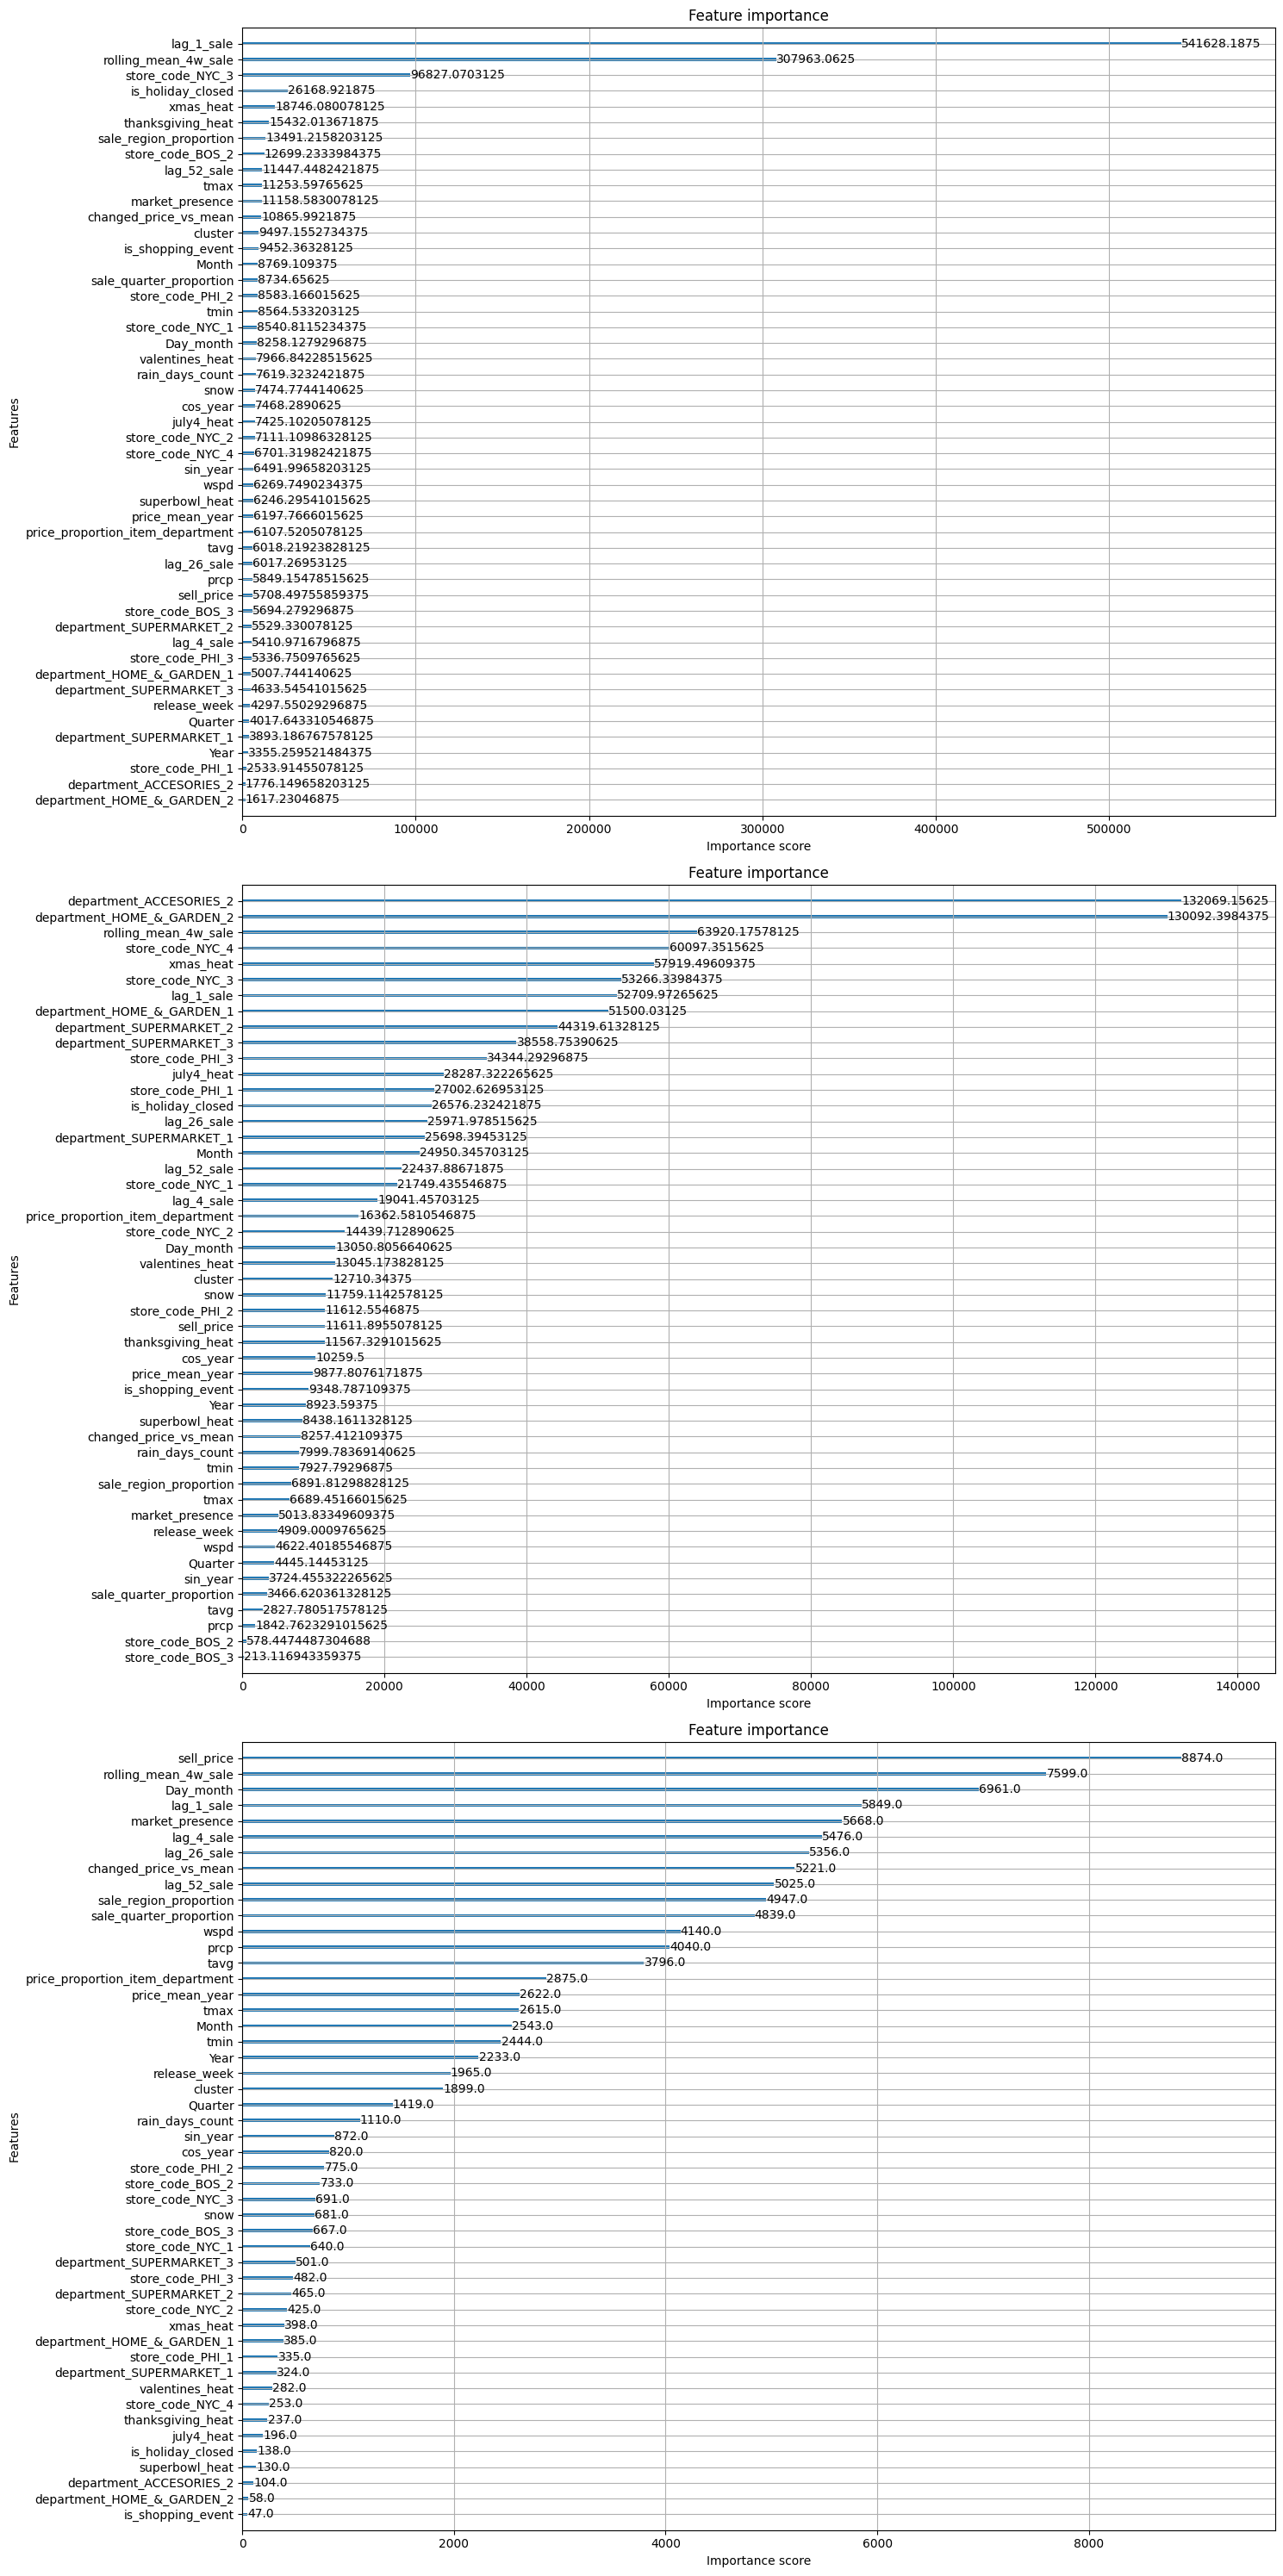

In [ ]:
fig = plt.figure(figsize=(15, 30))
ax1, ax2, ax3 = fig.subplots(3, 1)
xgb.plot_importance(booster = model, ax = ax1, importance_type = "gain")
xgb.plot_importance(booster = model, ax = ax2, importance_type = "cover")
xgb.plot_importance(booster = model, ax = ax3, importance_type = "weight")
plt.tight_layout();

# REFACTORIZAMOS BUSQUEDA DE FEATURES

In [ ]:
results = {}

In [ ]:
df_weekly.columns

Index(['sale', 'sell_price', 'week_number', 'Year', 'Quarter', 'Month',
       'Day_month', 'price_mean_year', 'price_proportion_item_department',
       'changed_price_vs_mean', 'cluster', 'release_week', 'market_presence',
       'sin_year', 'cos_year', 'tavg', 'tmin', 'tmax', 'prcp', 'snow', 'wspd',
       'rain_days_count', 'valentines_heat', 'xmas_heat', 'superbowl_heat',
       'thanksgiving_heat', 'july4_heat', 'is_shopping_event',
       'is_holiday_closed', 'lag_1_sale', 'lag_4_sale', 'lag_26_sale',
       'lag_52_sale', 'rolling_mean_4w_sale', 'sale_region_proportion',
       'sale_quarter_proportion', 'unique_id', 'store_code_BOS_2',
       'store_code_BOS_3', 'store_code_NYC_1', 'store_code_NYC_2',
       'store_code_NYC_3', 'store_code_NYC_4', 'store_code_PHI_1',
       'store_code_PHI_2', 'store_code_PHI_3', 'department_ACCESORIES_2',
       'department_HOME_&_GARDEN_1', 'department_HOME_&_GARDEN_2',
       'department_SUPERMARKET_1', 'department_SUPERMARKET_2',
       'd

In [ ]:
df_weekly.shape

(5927218, 52)

In [ ]:
columnas = df_weekly.columns
meta_data = ['unique_id', 'week_number', 'sale']
list_features = list(set(columnas) - set(meta_data))
print(list_features)

['lag_26_sale', 'sell_price', 'department_ACCESORIES_2', 'july4_heat', 'valentines_heat', 'tmax', 'tavg', 'department_SUPERMARKET_1', 'store_code_PHI_1', 'department_HOME_&_GARDEN_2', 'store_code_NYC_3', 'lag_4_sale', 'market_presence', 'store_code_NYC_1', 'tmin', 'changed_price_vs_mean', 'sale_region_proportion', 'prcp', 'superbowl_heat', 'lag_1_sale', 'thanksgiving_heat', 'xmas_heat', 'price_proportion_item_department', 'cluster', 'cos_year', 'store_code_BOS_2', 'store_code_NYC_2', 'store_code_PHI_3', 'sale_quarter_proportion', 'lag_52_sale', 'department_SUPERMARKET_3', 'department_SUPERMARKET_2', 'wspd', 'Month', 'store_code_PHI_2', 'sin_year', 'is_holiday_closed', 'rolling_mean_4w_sale', 'Year', 'price_mean_year', 'Quarter', 'store_code_BOS_3', 'snow', 'release_week', 'rain_days_count', 'department_HOME_&_GARDEN_1', 'store_code_NYC_4', 'Day_month', 'is_shopping_event']


In [ ]:
def select_features(list_features):
  import random
  #seleccionamos una cantidad random de features
  k = random.randint(10, 20)
  features_selected = random.sample(list_features, k)
  return features_selected

In [ ]:
x_train, y_train = get_data_splits(df_weekly, train_dates)
x_val, y_val = get_data_splits(df_weekly, val_dates)
x_test, y_test = get_data_splits(df_weekly, test_dates)

range(53, 254)
(5134765, 49) (5134765,)
range(255, 269)
(426602, 49) (426602,)
range(270, 279)
(274410, 49) (274410,)


In [ ]:
# Bucle de entrenamiento con selección aleatoria de features
for i in range(1, 100):
  print(i)
  features_selected = select_features(list_features)
  x_train_i = x_train[features_selected]
  x_val_i = x_val[features_selected]
  model = xgb.XGBRegressor( random_state = 42,
    objective='reg:squarederror',
    n_estimators=15,
    max_depth=10
  )
  model.fit(
    X = x_train_i,
    y = y_train
    #eval_set = [(X_train, y_train), (X_test, y_test)],
    #early_stopping_rounds = 20
  )
  y_train_pred = model.predict(x_train_i)
  rmse_train = root_mean_squared_error(y_true = y_train, y_pred=y_train_pred)
  y_val_pred = model.predict(x_val_i)
  rmse_test = root_mean_squared_error(y_true = y_val, y_pred=y_val_pred)
  results[i] = [list(set(features_selected) - set(meta_data)), rmse_train, rmse_test]
  

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


In [ ]:
df_results = pd.DataFrame.from_dict(results, orient='index', columns=['features', 'rmse_train', 'rmse_test'])
df_results.sort_values(by='rmse_test', inplace=True)
df_results['rmse_test'].min()

8.200313568115234

In [ ]:
df_results

,features,rmse_train,rmse_test
7,"[department_SUPERMARKET_3, wspd, Month, store_...",8.578605,8.200314
44,"[lag_52_sale, department_SUPERMARKET_2, depart...",9.713314,8.315386
64,"[snow, lag_26_sale, department_ACCESORIES_2, c...",9.165411,8.331149
82,"[lag_52_sale, department_SUPERMARKET_3, lag_26...",9.415110,8.587355
80,"[lag_26_sale, sell_price, store_code_PHI_2, va...",9.154408,8.657762
...,...,...,...
50,"[department_ACCESORIES_2, valentines_heat, dep...",22.853504,19.038788
26,"[store_code_NYC_3, market_presence, department...",21.985283,19.046444
54,"[Quarter, cluster, market_presence, snow, is_h...",24.244045,19.152710
33,"[store_code_NYC_3, department_SUPERMARKET_2, j...",25.442629,19.315842


In [ ]:
best_features = df_results[df_results['rmse_test'] < 9]['features']

In [ ]:
best_features.shape

(17,)

In [ ]:
dict_features = {}
for features in best_features:
    # hacemos conteo de diferentes features
    for feature in features:
        dict_features[feature] = dict_features.get(feature, 0) + 1

In [ ]:
# lo convertimos en dataframe para visualizar mejor
dict_features_df = pd.DataFrame.from_dict(dict_features, orient='index', columns=['count'])
dict_features_df.sort_values(by='count', ascending=False, inplace=True)
dict_features_df

,count
rolling_mean_4w_sale,16
tavg,10
Quarter,10
department_HOME_&_GARDEN_1,9
Month,9
store_code_PHI_2,9
xmas_heat,9
Day_month,9
lag_1_sale,9
release_week,8


In [ ]:
df_results.tail(15)

,features,rmse_train,rmse_test
41,"[Quarter, store_code_NYC_3, department_SUPERMA...",18.663218,17.008808
2,"[store_code_BOS_3, department_SUPERMARKET_3, s...",17.769043,17.220089
29,"[department_SUPERMARKET_3, department_SUPERMAR...",21.879961,17.559069
75,"[Quarter, store_code_BOS_3, department_SUPERMA...",17.057289,17.710155
38,"[department_SUPERMARKET_3, tmax, tavg, store_c...",21.508862,17.823734
87,"[store_code_BOS_3, market_presence, sell_price...",22.724815,17.868967
66,"[store_code_NYC_3, department_SUPERMARKET_3, s...",22.543125,18.122877
52,"[store_code_BOS_3, snow, changed_price_vs_mean...",21.175306,18.161551
85,"[store_code_NYC_3, store_code_NYC_1, departmen...",22.548334,18.312582
8,"[store_code_NYC_1, sell_price, sale_region_pro...",18.750097,18.426012


In [ ]:
worst_features = df_results[df_results['rmse_test'] > 17]['features']

In [ ]:
worst_features.shape

(15,)

In [ ]:
dict_features_worst = {}
for features in worst_features:
    # hacemos conteo de diferentes features
    for feature in features:
        dict_features_worst[feature] = dict_features_worst.get(feature, 0) + 1

dict_features_df_worst = pd.DataFrame.from_dict(dict_features_worst, orient='index', columns=['count'])
dict_features_df_worst.sort_values(by='count', ascending=False, inplace=True)
dict_features_df_worst

,count
department_SUPERMARKET_1,8
superbowl_heat,7
prcp,7
store_code_NYC_3,7
store_code_BOS_3,7
department_SUPERMARKET_3,6
sale_quarter_proportion,6
market_presence,6
sell_price,6
store_code_PHI_1,6


NameError: name 'df_weekly' is not defined

In [ ]:
# Bucle de entrenamiento con selección aleatoria de features 2
for i in range(1, 100):
  print(i)
  features_selected = select_features(list_features)
  x_train_i = x_train[features_selected]
  x_val_i = x_val[features_selected]
  model = xgb.XGBRegressor( random_state = 42,
    objective='reg:squarederror',
    n_estimators=1000,
    learning_rate=0.2,
    max_depth=8,
    n_jobs=-1,
    early_stopping_rounds = 20
  )
  model.fit(
    X = x_train_i,
    y = y_train,
    eval_set = [(x_train_i, y_train), (x_val_i, y_val)]
  )
  y_train_pred = model.predict(x_train_i)
  rmse_train = root_mean_squared_error(y_true = y_train, y_pred=y_train_pred)
  y_val_pred = model.predict(x_val_i)
  rmse_test = root_mean_squared_error(y_true = y_val, y_pred=y_val_pred)
  results[i] = [list(set(features_selected) - set(meta_data)), rmse_train, rmse_test]

In [ ]:
df_results_2 = pd.DataFrame.from_dict(results, orient='index', columns=['features', 'rmse_train', 'rmse_test'])
df_results_2 .sort_values(by='rmse_test', inplace=True)
df_results_2['rmse_test'].min()

8.315385818481445

In [ ]:
best_features_2 = df_results_2[df_results_2['rmse_test'] < 9]['features']
dict_features = {}
for features in best_features_2:
    # hacemos conteo de diferentes features
    for feature in features:
        dict_features[feature] = dict_features.get(feature, 0) + 1

# lo convertimos en dataframe para visualizar mejor
dict_features_df = pd.DataFrame.from_dict(dict_features, orient='index', columns=['count'])
dict_features_df.sort_values(by='count', ascending=False, inplace=True)
dict_features_df

In [ ]:
worst_features_2 = df_results_2[df_results_2['rmse_test'] > 17]['features']

dict_features_worst = {}
for features in worst_features_2:
    # hacemos conteo de diferentes features
    for feature in features:
        dict_features_worst[feature] = dict_features_worst.get(feature, 0) + 1

dict_features_df_worst = pd.DataFrame.from_dict(dict_features_worst, orient='index', columns=['count'])
dict_features_df_worst.sort_values(by='count', ascending=False, inplace=True)
dict_features_df_worst

## Results